# Deep Learning

Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks. Using some observed data as input, we can train a deep neural network to either predict the classes of that data, or the parameter values of that data. We will do this using various modules from the `keras` python deep learning API package. Similar to what we have seen in both the unsupervised and the supervised case, you can think of a deep neural network as essentially a function approximater, such as

$$ y = f (x) $$

where $y$ is the output and $x$ is the data. In the deep learning case, both the data $x$ and the labels $y$ may be either known or unknown depending on the network you are using (supervised/unsupervised). The complexity of the function that we use to map our input $x$ to our output $y$ is entirely up to you, the user. We will discuss below various different types of deep learning algorithms that are available to you and all the various knobs (hyperparameters) you can tune to solve your problems. Have fun!

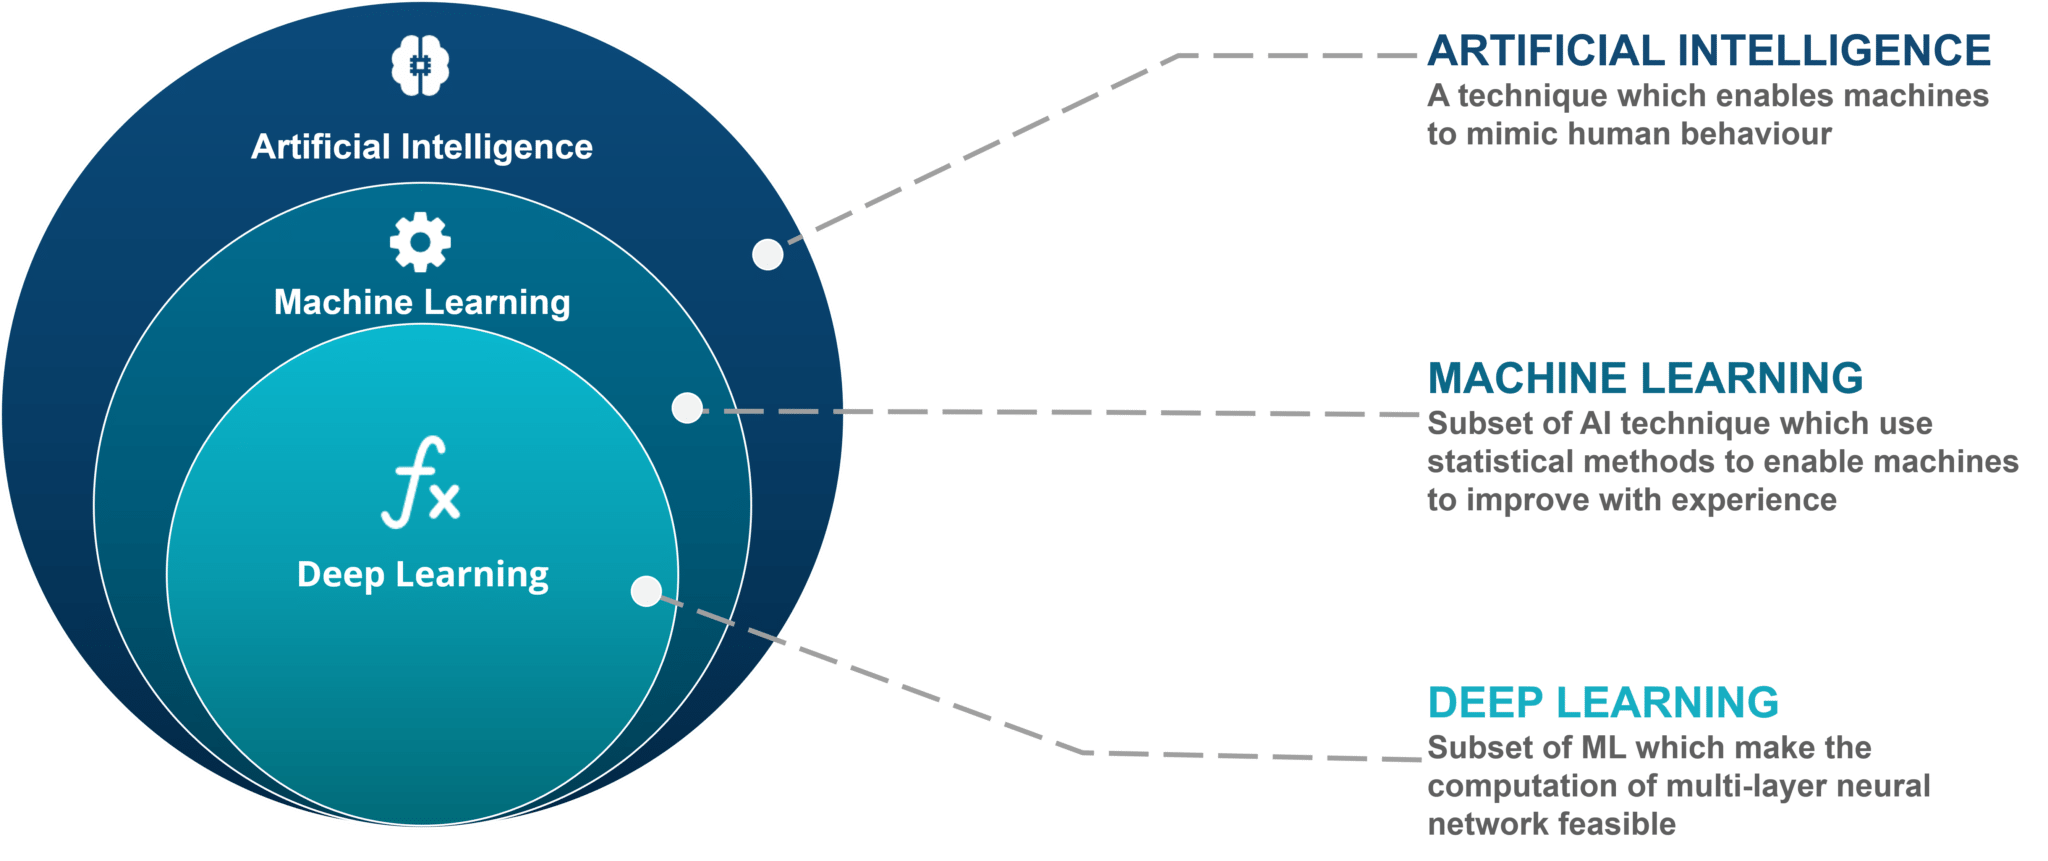

## Exercise 1: Estimating the Frequency of a Sine Wave using Fully-Connected Neural Networks

In this exercise, we will be using a simple fully-connected deep neural network much like the one seen in the figure below.

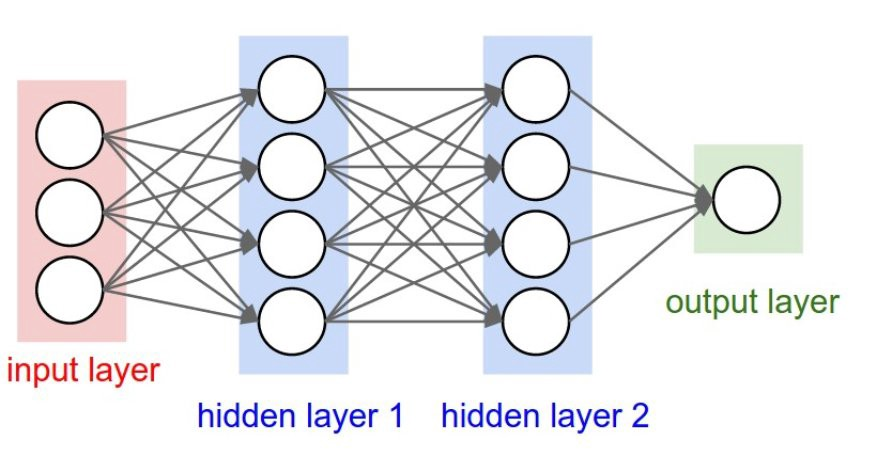


A single layer in this network can be described by

$y_i = \sigma(w_1 \times x_1 + ... + w_m \times x_m )$,

where $x_m$ is the mth input, $y_m$ is the mth output and $w$ is the corresponding weight for the mth neuron. In this exercise, our input, $x$, will be a set of 1-D sine-wave signals. What we will be trying to predict in the output layer, given those signals, will be some parameters, $y$,  that describe a sine wave. 

In [ ]:
# import required modules
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, LSTM, Flatten
from keras.optimizers import SGD
from matplotlib import pyplot as plt

First, we will define some hyperparameters (knobs you can turn) which will affect the accuracy and behavior of the network during training. You can leave them as is for now, but you may come back to the cell below later to change them as you wish.

In [ ]:
# define some global parameters
max_freq = 10. # maximum allowed frequency of the sine-wave
Nsamples = 200 # sampling frequency above nyquist
Nsignals = 10000 # total number of signals to generate

# network params
epochs = 20 # total number of training epochs
batch_size = 64 # number of signals to send into neural network per training iteration

I have provided below a general function which takes as input frequency and phase that we will be using to generate sine-wave signals. However, if you're feeling particularly keen, you may also try other functions such as sine-Gaussian waveforms.

In [ ]:
def gen_sine(frequency, phase):
    "Generate a sinusoidal signal with a given frequeny and phase shift"
    return np.sin(frequency * np.linspace(phase, phase + 2. * np.pi, Nsamples))

### Make Data

Below, I have provided code that will generate both the sine-wave signals $X$ and the parameters of those signals $Y$ in a format that will be easy for the deep neural network read in.


In [ ]:
# generate parameter labels
Y = np.array([np.random.uniform(0.1,max_freq,Nsignals),np.random.uniform(0,1,Nsignals)]).T

# iterate through parameters and generate sine waves
X = np.array([gen_sine(y[0], y[1]) for y in Y])


# split data into train/test sets

# get a random set of indices
train_idx = np.random.randint(X.shape[0], size=int(0.9*X.shape[0]))
test_idx = np.random.randint(X.shape[0], size=int(0.1*X.shape[0]))

# split the data
x_train, x_test = X[train_idx,:], X[test_idx,:]
y_train, y_test = Y[train_idx,:], Y[test_idx,:]

Now that you have both your input data $X$ and your parameter labels for that input data $Y$, make a few plots of the sine-waves contained in $X$. Is there enough variation from signal to signal? Is the frequency too high? Is the length of the time series long enough? 

You shouldn't find any problems, but as a machine learner, it's always best practice to double check your data.

If you're satisfied with the quality of the input that you will be using, we can set up our deep fully-connected neural network model. To do this, please refer to the following [example](https://keras.io/getting-started/sequential-model-guide/) for pointers on how to make your own neural network. 

Some tips:
-  Use the `Sequential()` model.
-  Start out with 1-2 hidden layers (i.e. `model.add(Dense(num_neurons))`).
-  Use two neurons in the final `Dense` layer with a `linear` activation function.
-  I would start with using `relu` activation functions in the hidden layers.
-  `model.summary()` will return a summary of the structure of your neural network.

Compile your model using the `model.compile()` keras function. 

-  Use the `mean_squared_error` loss function, since we are trying to minimize the difference between the neural network predicted parameters and the true sine-wave parameters. 
-  You can choose whatever optimizer you want, but I would stick with stochastic gradient descent (SGD).
-  make sure to set the `metrics` variable in `model.compile` equal to `['accuracy']`

Train your model using the keras `model.fit()` function and then evalaute the accuracy of your model using the `model.evaluate()` function. Go ahead and set the output of `model.fit()` equal to some variable (I would call it `history`). This `history` variable will contain a history of the training, which includes the loss (which you are trying to minimize). Set the output of the `model.evaluate` function to some variable (could call it `score`). Printing `score` will return the overall loss of the network after testing on new data it hasn't seen before, as well as the accuracy. Try to aim for a loss during testing of ~0.03 an accuracy of ~97%. See keras documentation for further details on fitting function. [link](https://keras.io/models/model/)

Try retrieving the actual values for the parameter predictions from the deep neural network using the keras `model.predict()` function. Execute this using the `x_test` data.

You can now plot the predicted values in a scatter plot as a function of the true values for each parameter. If the predictions are exactly the true value, we would expect a straight line. We actually end up seeing a line with some spread, the more spread the less accurate the predictions.

In this case the periodic nature of the sine wave makes estimating the phase shift $\phi$ hard, but the frequency $f$ is easy enough.

## Exercise 2: Classification of the MNIST Digits Dataset using Convolutional Neural Networks

Convolutional neural networks (CNNs) are typically composed of layers of 2-D nuerons known as filters. Similar to a fully-connected deep neural network, each one of these filters is also fully-connected to all the filters in both the next and previous convolutional layer. The output of 2D filters is passed from one hidden layer to the next (retaining spatial information) until the flattening layer where the output is flattened into a 1D array. The output is then forwarded through some fully-connected layers and finally to the output layer, where predictions are made. 

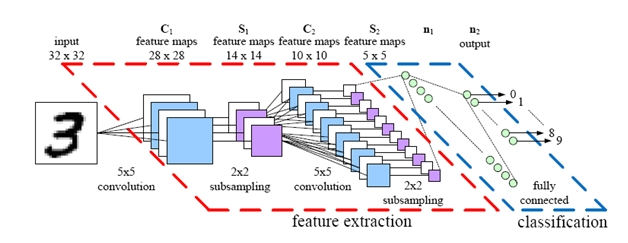

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras import backend as K

import matplotlib.pyplot as plt

For this exercise we will be using MNIST, which is a handwrriten digit database with a training set of 60,000 handwritten 2D digital images and a test set of 10,000 handwritten 2D digital images. The images are all 28x28 pixels and greyscale. It is available [here](http://yann.lecun.com/exdb/mnist/), but is included in Keras and will automatically download.

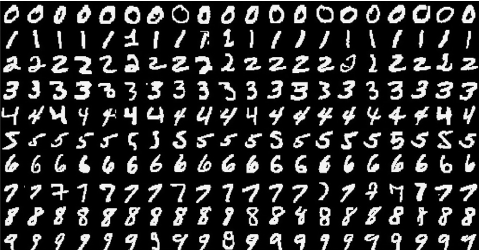

First, load in the MNIST data using the `mnist.load_data` keras module [mnist load data ex](https://keras.io/datasets/).

Here, you should end up with two sets of arrays which are the training/testing images (`x_train`,`x_test`) and two sets of arrays (`y_train`,`y_test`) which are the labels.

Try plotting a 9 of your training images with the `matplotlib` [subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) and [imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) modules.

We'll define some general hyperparameters which we will be using during training below. You can change the values of these hyperparameters later on (except for the number of classes).

In [ ]:
batch_size = 128    # number of images passed each iteration
num_classes = 10    # digits 0 to 9
epochs = 20         # number of full passes of the dataset

For the CNN, the data needs to be parsed as a 2D array, rather than a 1D array. Reshape your training/testing images to be of the shape (number_samples,number_pixels,number_pixels,1). Additionally, it is generally good practice to normalize your training/testing set such that the image array values range from $0$ to $1$. Normalizing your set will reduce the space over which the convolutional neural network has to search.

In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28

# reshape data
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255                           # normalize training set
x_test /= 255                            # normalize testing set
print('x_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Use the keras module `keras.utils.to_categorical` to convert your training/testing labels from integer to binary class matrices, also known as one-hot encoding (e.g. from ($0$) to ($1$,$0$,$0$),from ($1$) to ($0$,$1$,$0$), and from ($2$) to ($0$,$0$,$1$)). Remember, the number of classes you will be training over is $10$.

We've now finally gotten to stage where we can define the structure of our deep convolutional neural network module. Refer to the **Building the Module** section of the following link for an example on how to build a convolutional neural network model. [link](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5)

**Tips**
-  For the `input_shape` variable in your first hidden layer, use the `input_shape` variable defined in the reshaping cell you executed above.
-  Use 2-3 hidden `Conv2D` layers.
-  Try using a `MaxPooling2D` layer.
-  Try using a `Dropout` layer.
-  Use 1-2 `Dense` hidden layers.
-  Make sure your final layer is a `Dense` layer with the number of neurons equal to `num_classes` and has a `softmax` activation function.

There are several different hyperparameters that you can play with. I would try adjusting the following after having gone through one training session of your network (we will do this in the cells below):
-  Dropout
-  Number of hidden layers
-  Max pooling
-  Number of filters/neurons per layer
-  Activation functions in each layer

Compile the CNN model using the keras `model.compile` function. See the **compiling the model** section in the following link for an example on how to apply this: [link](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5)

**Tips**
-  Use a categorical_crossentropy loss
-  Try different optimizers. Each have their own hyperparameters you can tune.

Train your model on the training data/labels using the keras `model.fit` function. Once your model has been trained, you can test the accuracy of your model using the keras `model.evaluate` function. The fitting function will return the loss of the neural network after training and the evaluate function will return an accuracy percentage score of the neural network. See the `training the model` section in the following link for an example on how to apply the `model.fit` function: [link](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5)

Ideally, you should be aiming for 95+ classification percent accuracy. Keep tunning the network hyperparameters until you get a good score. This is the fun part!

## Exercise 3: Text Generation using Long Short Term Memory (LSTM) Networks

Long Short-Term Memory (LSTM) networks are an improvement on recurrent neural networks (RNN), which basically extend their memory. Because of this, it's is well suited to learn from important experiences that have very long time lags in between. The units of an LSTM are used as building units for the layers of a RNN, which is then often called an LSTM network.

LSTMs also contain something known as memory (much like RAM in a computer). This memory is usually known as a gated cell, where gated means whether or not the cell can store deleted information. Weights are assigned in order to determine the importance of what bits of information to keep or discard.

In LSTMS, we have three gates: input, forget, and the output gate. The gates determine whether or not we allow new input in (input gate), delete unimportant information (forget gate), or allow the input information to affect the output of the network (output gate). The gates are typically in the form of a sigmoid function which has ranges from $0$ to $1$ (see figure below). If we put enough of these units together, we can create a deep neural network which will make predictions on sequentially dependent data!

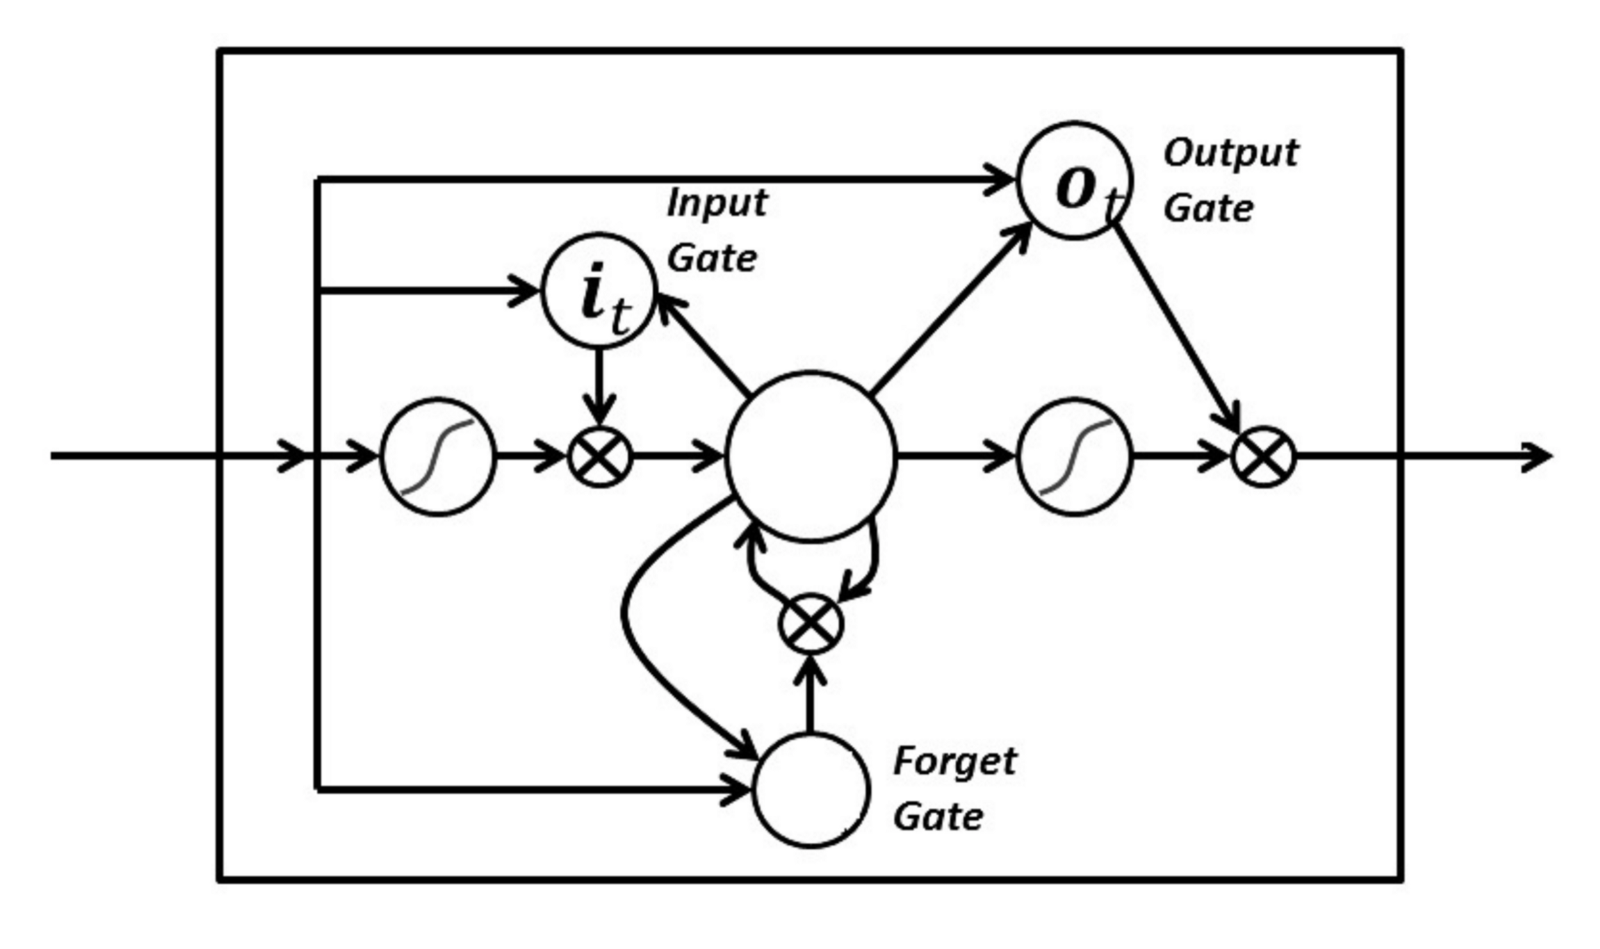


In the exercise below, you will take a dataset containing some of Nietzche's writings and make an LSTM which will produce Neitzche-like text.


In [ ]:
%matplotlib notebook
%config InlineBackend.figure_format = "retina"

from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file

import numpy as np
import random
import sys
import io

The dataset to be used for this first exercise is a freely avaiable text dataset of [Nietzsche's writings](https://s3.amazonaws.com/text-datasets/nietzsche.txt) you can download. We will use the keras data utility `get_file` to download the text. This dataset will need spliting up into smaller sequences that can then be used to train the LSTM.  Load in this data and inspect it.

* What is the shape of the data?
* What does this tell you about the number of features that describes the data?
* How many different types of data are there?

In [ ]:
# get the data
path = get_file('nietzsche.txt', origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
with io.open(path, encoding='utf-8') as f:
    text = f.read().lower()
print('corpus length:', len(text))



Now that you have loaded in the dataset, we should figure out the total number of characters in the dataset. You can do this by turning the `text` variable into a python set and that set into list using both python built-in function `list` and `set`. You can order the text using the built-in python function `sorted`.

In [ ]:
# how many different characters is that?
chars = sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

Now we will split the dataset up into a list of sub-sequences, which is what the LSTM requires as input. Each one of these subsequences will have a max length of 40 characters. In addition, make a seperate list containing the next character that follows each subsequence. We make sure to leave at least 40 characters at the end of the dataset to be set aside as testing data to be used later.

In [ ]:
# cut the text in semi-redundant sequences of max length characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

Put the sequences into an array called $x$ and the list of next characters into an array called $y$. 

In [ ]:
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Now that we have our training data/labels loaded in, we can finally construct our LSTM neural network. To do this, use the Keras sequential LSTM module which we have imported in the first cell block. If you're having trouble constructing the model, please refer to the following LSTM example post or ask a demonstrater for some hints. [LSTM example](https://medium.com/@dclengacher/keras-lstm-recurrent-neural-networks-c1f5febde03d) 

**Tips**
-  Use a `Sequential` model.
-  Use the keras `LSTM` layers. Try just 1 at first with 128+ cells (basically neurons).
-  Number of neurons in the final `Dense` layer should be equivalent to the total number of characters we want to predict.
-  Activation function in the final layer should be **softmax**.

Next, compile your model using a keras [optimizer](https://keras.io/optimizers/) of your choice. 

**Tips**
-  The `RMSprop` optimizer generally works well here.
-  Use the `categorical_crossentropy` loss.

Fit your model (using `x` and `y` defined above). This will take about 3-5 minutes per epoch on a CPU. Will run much faster on a GPU in Google Colabs.

**Tips**
-  start with a batch size of 128 and number of epochs of 10.

Try running the following cell below to sample a prediction from the LSTM network after every 1 epoch of training. In order to use this, you can set the `print_callback` variable below as a callback in your `model.fit` function. 

`model.fit(x,y,batch_size=128,epochs=10,callback=your_callback_variable)`

In [ ]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

def on_epoch_end(epoch, logs):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()
        
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)
        
model.fit(x, y,
          batch_size=128,
          epochs=10,
callbacks=[print_callback])


Feel free to play around with hyperparameters such as batch size, number of epochs, optimizer, number of LSTM layers, etc. If you're feeling especially ambitious, you can also try loading in and training over other datasets from the following [Project Gutenberg](https://www.gutenberg.org/ebooks/search/%3Fsort_order%3Ddownloads). Project Gutenberg has a large number of .txt free books which are no longer protected by copyright. An example of a link I might download a book from can be found at the following [page](http://www.gutenberg.org/cache/epub/11/pg11.txt).

## Exercise 4: Using GANs for Generating Hand-written Digit Images

**GAN (Generative Adversarial Network)** is a framework proposed by Ian Goodfellow, Yoshua Bengio and others in 2014.  

A GAN can be trained to generate images from random noises.  For example, we can train a GAN on MNIST (hand-written digits dataset) to generate digit images that look like hand-written digit images from MNIST, which could be used to train other neural networks.

The code in this notebook is based on the **GAN MNIST example in TensorFlow by Udacity** which uses TensorFlow, whereas this uses Keras on top of TensorFlow for more straightforward construction of networks.  Many of the ideas on training are from **How to Train a GAN? Tips and tricks to make GANs work**.

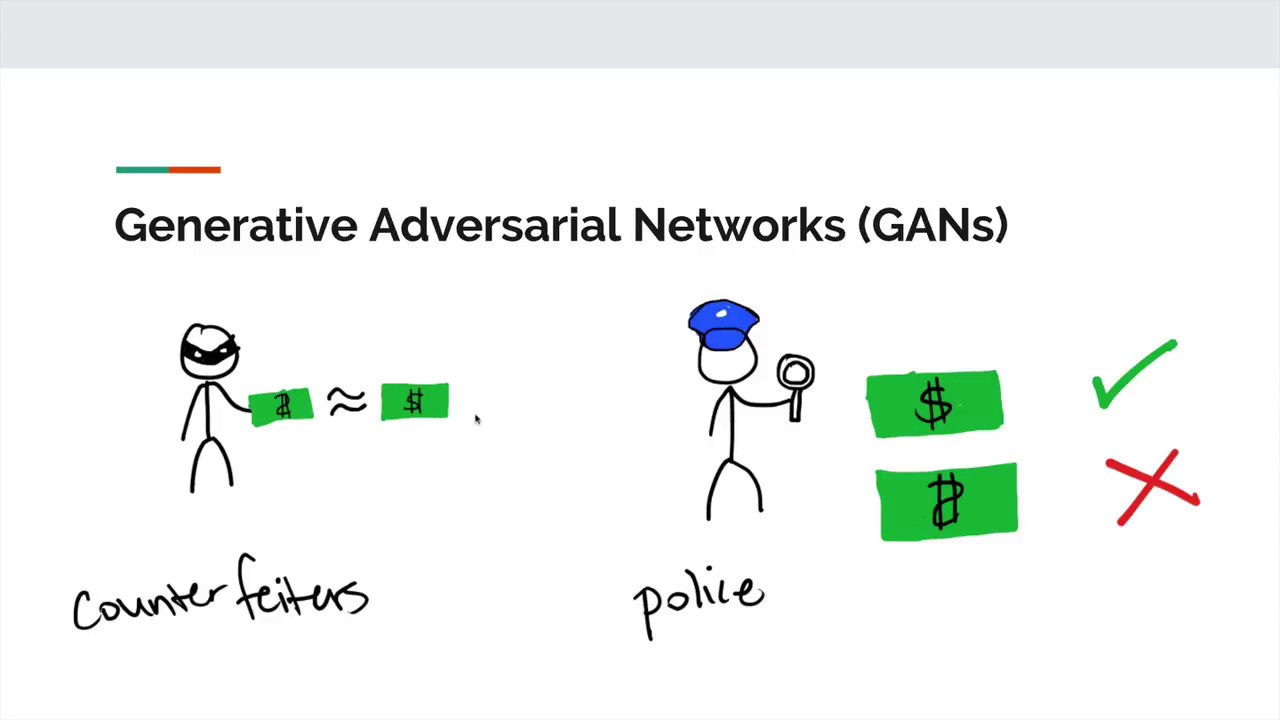

## MNIST

MNIST is a well known database of handwritten digits.

In [2]:
import numpy as np
import keras
import keras.backend as K
from keras.layers import Input, Dense, Activation, LeakyReLU, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


The below will download the MNIST dataset.

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Let's examine sample images.  We use 'gray' color map since it has no color information.

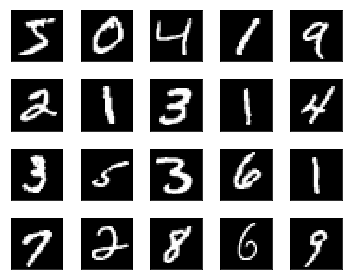

In [4]:
plt.figure(figsize=(5, 4))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

All MNIST digit images come in 28x28 size.

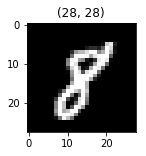

In [5]:
sample = X_train[17]

plt.figure(figsize=(3, 2))
plt.title(sample.shape)
plt.imshow(sample, cmap='gray')
plt.show()

The minimum and maximum sizes of MNIST image data is 0 and 255 respectively.

In [7]:
X_train.min(), X_train.max()

(0, 255)

## Generator

We want to build a generator that generates realistic hand-written images.  

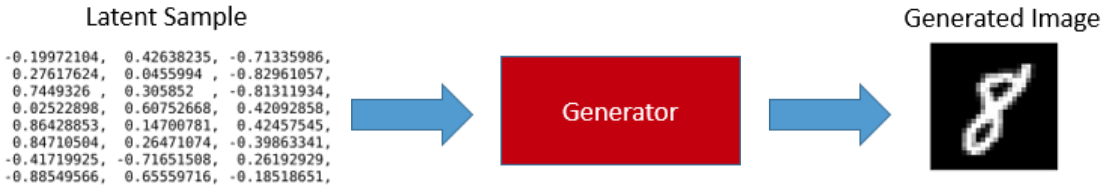

The input to the generator is called a 'latent sample' which is basically just a series of randomly generated numbers. These numbers will hopefully end up being mapped through the generator to some image which looks a lot like a handwritten number.  We can use either a normal distribution or a uniform distribution. We'll use a normal distribution for this case.

In [8]:
def make_latent_samples(n_samples, sample_size):
    #return np.random.uniform(-1, 1, size=(n_samples, sample_size))
    return np.random.normal(loc=0, scale=1, size=(n_samples, sample_size))

Try using the function above to make one sample of a hundred random numbers. We will use this function later to make our GAN.

The generator is a simple fully connected neural network with one hidden layer with the leaky ReLU activation.  It takes one latent sample (100 values) and produces 784 (=28x28) data points which represent a digit image.

Go ahead and try making your own generator using the same Keras sequential model as you have used in exercise 1.

**Tips**
-  Use the `Sequential model` and set it equal to a unique variable name (generator).
-  Set your input shape to be 784. This is because we will be flattening our 2D 28x28 image into a 1D 784 long vector.
-  Use the `Dense` keras layer along with a `LeakyReLU` activation function.
-  In the final `Dense` layer, use a `tanh` activation function.
-  Check to see if your network looks alright by using the `model.summary` function.

The last activation is **tanh**.  It means that we need to rescale the MNIST images to be between -1 and 1. We'll do this later.

Initially, the generator can only produce garbages.

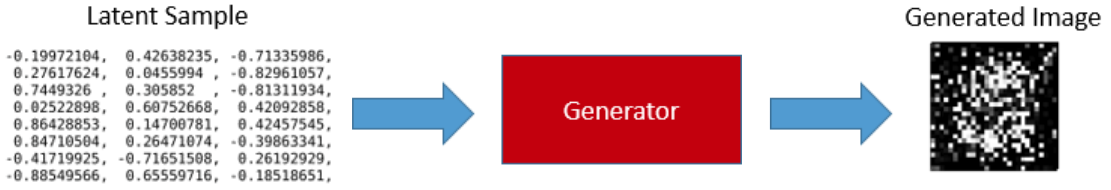

As such, the generator needs to learn how to generate realistic hand-written images from the latent sample (randomly generated numbers).

How to train this generator?  That is the question tackled by GAN.

Before talking about GAN, we'll talk about the discriminator.

## Discriminator

The discriminator takes a digit image and classifies whether an image is real (1) or not (0).  

If the input image is from the MNIST database, the discriminator should classify it as real.

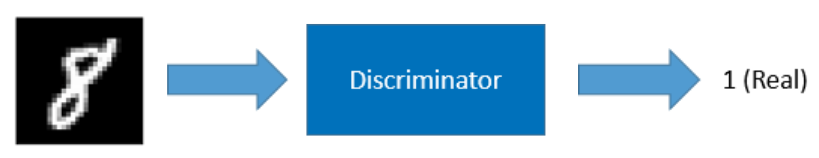

If the input image is from the generator, the discriminator should classify it as fake.

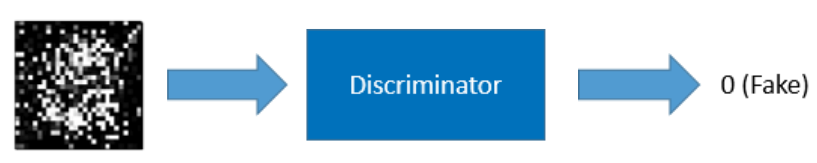

The discriminator is a simple fully connected neural network with one hidden layer with the leaky ReLU activation. Go ahead and try setting up the discriminator model on your own below.

**Tips**
-  Use the `Sequential model` and set it equal to a unique variable name (discriminator).
-  Set your input shape to be 784. This is because we will be flattening our 2D 28x28 image into a 1D 784 long vector.
-  Use the `Dense` keras layer along with a `LeakyReLU` activation function.
-  In the final `Dense` layer, use a `sigmoid` activation function.
-  Check to see if your network looks alright by using the `model.summary` function.

The last activation is **sigmoid** to tell us the probability of whether the input image is real or not.

We train the discriminator using both the MNIST images and the images generated by the generator.

## GAN

We connect the generator and the discriminator to produce a GAN.  

It takes the latent sample, and the generator inside GAN produces a digit image which the discriminator inside GAN classifies as real or fake.

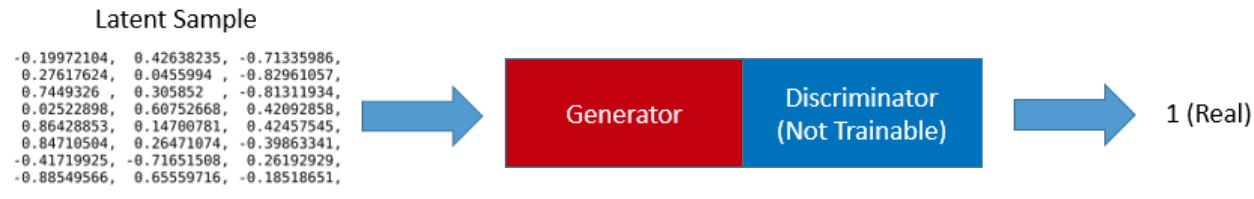

If the generated digit image is so realistic, the discriminator in the GAN classifies it as real, which is what we want to achieve.

We set the discriminator inside the GAN not-trainable, so it is merely evaluating the quality of the generated image.  The label is always 1 (real) so that if the generator fails to produce a realistic digit image, its cost becomes high, and when the back-propagation occurs in GAN, the weights in the generator network gets updated.

In [10]:
# maintain the same shared weights with the generator and the discriminator.
gan = Sequential([
    generator,
    discriminator
])

gan.summary()

NameError: name 'generator' is not defined

As you can see, the GAN internally uses the same generator and the discriminator models.  The GAN maintains the same shared weights with the generator and the disriminator.  Therefore, training the GAN also trains the generator.  However, we do not want the discriminator to be affected while training the GAN.

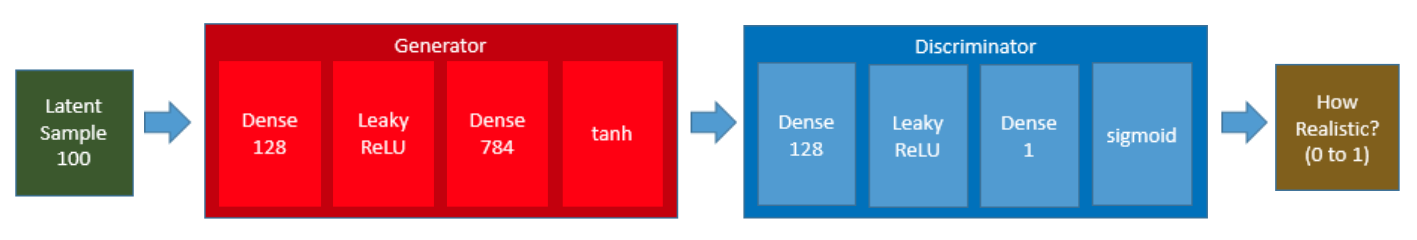

We train the discriminator and the GAN in turn and repeat the training many times until both are trained well.  

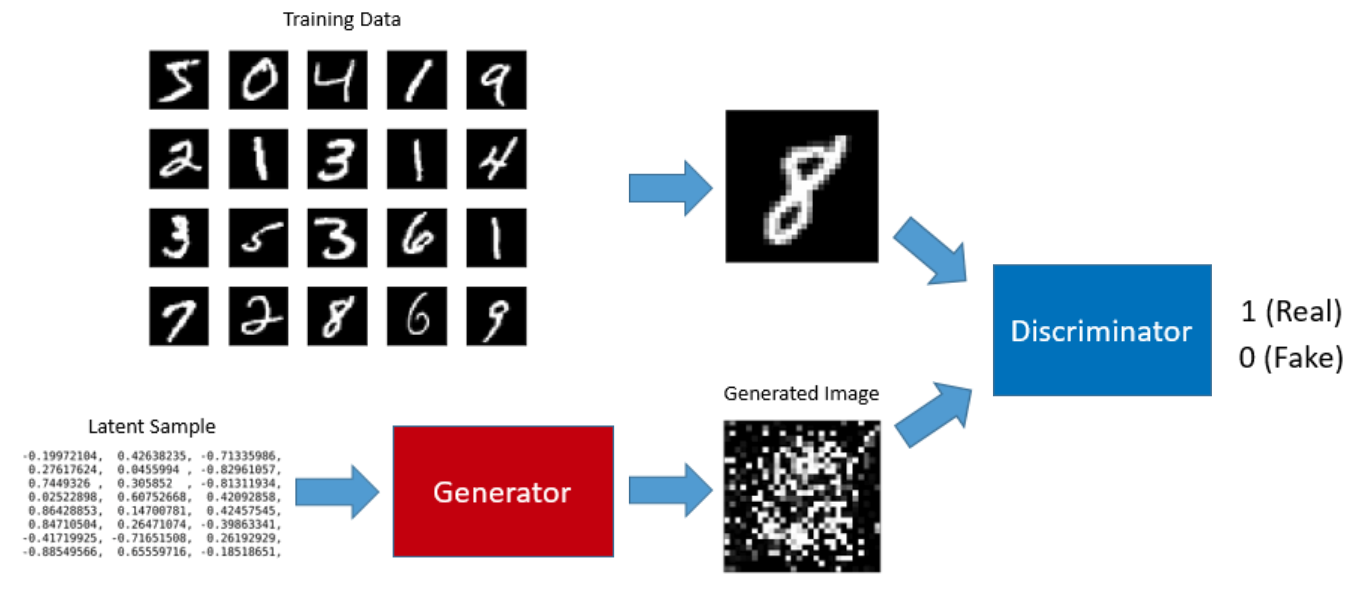

While training the GAN, the back-propagation should update the weights of the generator but not the discriminator.

As such, we need a way to make the discriminator trainable and non-trainable.

In [ ]:
def make_trainable(model, trainable):
    for layer in model.layers:
        layer.trainable = trainable

In [ ]:
make_trainable(discriminator, False)
discriminator.summary()

In [ ]:
make_trainable(discriminator, True)
discriminator.summary()

The below function combines everything we have discussed so far to build the generator, discriminator, and GAN models and also compile them for training.

In [ ]:
def make_simple_GAN(sample_size, 
                    g_hidden_size, 
                    d_hidden_size, 
                    leaky_alpha, 
                    g_learning_rate,
                    d_learning_rate):
    K.clear_session()
    
    generator = Sequential([
        Dense(g_hidden_size, input_shape=(sample_size,)),
        LeakyReLU(alpha=leaky_alpha),
        Dense(784),        
        Activation('tanh')
    ], name='generator')    

    discriminator = Sequential([
        Dense(d_hidden_size, input_shape=(784,)),
        LeakyReLU(alpha=leaky_alpha),
        Dense(1),
        Activation('sigmoid')
    ], name='discriminator')    
    
    gan = Sequential([
        generator,
        discriminator
    ])
    
    discriminator.compile(optimizer=Adam(lr=d_learning_rate), loss='binary_crossentropy')
    gan.compile(optimizer=Adam(lr=g_learning_rate), loss='binary_crossentropy')
    
    return gan, generator, discriminator 

## Training GAN

### Preprocessing

We need to flatten the digit image data as the fully connected input layer expects that.  Also, as the generator uses the **tanh** activation in the output layer, we scale all the MNIST images to have values between -1 and 1.

In [11]:
def preprocess(x):    
    x = x.reshape(-1, 784) # 784=28*28
    x = np.float64(x)
    x = (x / 255 - 0.5) * 2
    x = np.clip(x, -1, 1)
    return x

In [12]:
X_train_real = preprocess(X_train)
X_test_real  = preprocess(X_test)

### Deprocessing

We also need a function to reverse the preprocessing so that we can display generated images.

In [ ]:
def deprocess(x):
    x = (x / 2 + 1) * 255
    x = np.clip(x, 0, 255)
    x = np.uint8(x)
    x = x.reshape(28, 28)
    return x

In [ ]:
plt.figure(figsize=(5, 4))
for i in range(20):
    img = deprocess(X_train_real[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

### Labels

The labels are 1 (real) or 0 (fake) in 2D shape.

In [ ]:
def make_labels(size):
    return np.ones([size, 1]), np.zeros([size, 1])

The below is 10 sets of real and fake label values.

In [ ]:
y_real_10, y_fake_10 = make_labels(10)

y_real_10, y_fake_10

Later, we prepare the labels for training and evaluation using the train batch size and the test size.  

### Label Smoothing

One last point before we start training is the label smoothing which makes the discriminator generalize better.

For the real digit images, the labels are all 1s.  However, when we train the discriminator, we use a value slightly smaller than 1 with the real digit images.  Otherwise, the discriminator might overfit to the training data and rejects anything else that is slightly different from the training images.

### Training Loop

We repeat the following to make both the discriminator and the generator better and better:

* Prepare a batch of real images
* Prepare a batch of fake images generated by the generator using latent samples
* Make the discriminator trainable
* Train the discriminator to classify the real and fake images
* Make the discriminator non-trainable
* Train the generator via the GAN

When training the generator via the GAN, the expect labels are all 1s (real).  Initially, the generator produces not very realistic images so the discriminator classifies them as 0s (fake), which causes the back-propagation to adjust the weights inside the generator.  The discriminator is not affected as we set it non-trainable in this step.

In [ ]:
# hyperparameters
sample_size     = 100     # latent sample size (i.e., 100 random numbers)
g_hidden_size   = 128
d_hidden_size   = 128
leaky_alpha     = 0.01
g_learning_rate = 0.0001  # learning rate for the generator
d_learning_rate = 0.001   # learning rate for the discriminator
epochs          = 100
batch_size      = 64      # train batch size
eval_size       = 16      # evaluate size
smooth          = 0.1

# labels for the batch size and the test size
y_train_real, y_train_fake = make_labels(batch_size)
y_eval_real,  y_eval_fake  = make_labels(eval_size)

# create a GAN, a generator and a discriminator
gan, generator, discriminator = make_simple_GAN(
    sample_size, 
    g_hidden_size, 
    d_hidden_size, 
    leaky_alpha, 
    g_learning_rate,
    d_learning_rate)

losses = []
for e in range(epochs):
    for i in range(len(X_train_real)//batch_size):
        # real MNIST digit images
        X_batch_real = X_train_real[i*batch_size:(i+1)*batch_size]
        
        # latent samples and the generated digit images
        latent_samples = make_latent_samples(batch_size, sample_size)
        X_batch_fake = generator.predict_on_batch(latent_samples)
        
        # train the discriminator to detect real and fake images
        make_trainable(discriminator, True)
        discriminator.train_on_batch(X_batch_real, y_train_real * (1 - smooth))
        discriminator.train_on_batch(X_batch_fake, y_train_fake)

        # train the generator via GAN
        make_trainable(discriminator, False)
        gan.train_on_batch(latent_samples, y_train_real)
    
    # evaluate
    X_eval_real = X_test_real[np.random.choice(len(X_test_real), eval_size, replace=False)]
    
    latent_samples = make_latent_samples(eval_size, sample_size)
    X_eval_fake = generator.predict_on_batch(latent_samples)

    d_loss  = discriminator.test_on_batch(X_eval_real, y_eval_real)
    d_loss += discriminator.test_on_batch(X_eval_fake, y_eval_fake)
    g_loss  = gan.test_on_batch(latent_samples, y_eval_real) # we want the fake to be realistic!
    
    losses.append((d_loss, g_loss))
    
    print("Epoch: {:>3}/{} Discriminator Loss: {:>6.4f} Generator Loss: {:>6.4f}".format(
        e+1, epochs, d_loss, g_loss))    

### Stabilizing GAN

As it turns out, training a GAN is quite hard, and there are many tricks and heuristics required.  It is because the discriminator and the generator are not cooperating and individually learning to predict better.  

For example, the generator might learn to fool the discriminator with garbage.   Ideally, the discriminator should learn earlier than the generator so that it can classify images accurately.

Therefore, I used different learning rates for the generator and the discriminator.  I wanted to slow down the generator learning so that the discriminator learns to classify well.

I am not 100% certain if this is a generally good strategy to use but it does seem to work in this project.

As the generator learns more and the loss decreases, the discriminator's loss increases.  I kind of see equilibrium around 80-90 epochs.

In [ ]:
losses = np.array(losses)

fig, ax = plt.subplots()
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()
plt.show()

### Tracking Failures

* The discriminator loss = 0 means something is wrong
* When things are working, the discriminator loss has low variance and goes down over time.
* When things are not working, the discriminator loss has huge variance and spiking
* If the generator loss steadily decreases, it is fooling the discriminator with garbage.


### Don't balance via loss statistics 

* i.e., don't try to find a (number of G/number of D) schedule to uncollapse training

## Testing the Generator

Now we generates some digit images using the trained generator.

In [ ]:
latent_samples = make_latent_samples(20, sample_size)
generated_digits = generator.predict(latent_samples)

plt.figure(figsize=(10, 8))
for i in range(20):
    img = deprocess(generated_digits[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

The results are not outstanding as we are using simple networks.  Deep Convolutional GAN (aka DCGAN) would produce better results than this. Now that you've had a brief introduction to GANs, go ahead and try it playing around with the overall structure of the network (adding layers, different activation functions, etc.) and tunning various hyper parameters (number of epochs, batch size, learning rate, etc.). Happy GANing!

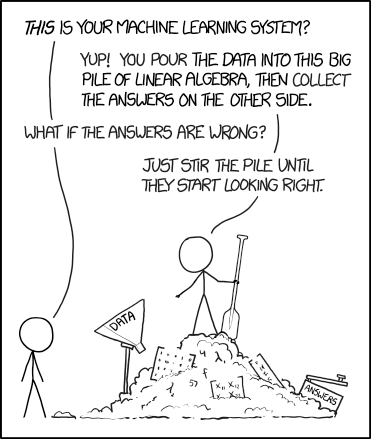